In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Define the class of LinearRegression

In [2]:
class LinearRegression:
    
    def __init__(self , lr=0.001,n_iters=1000):
        self.lr=lr
        self.n_iters = n_iters
        self.weights = None
        self.bias =None
        
    def fit(self,X,y):
        n_samples,n_features= X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            
            
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred
         

* Load the data

In [3]:
med_df = pd.read_csv('Medical Price Dataset.csv')

In [4]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
med_df.shape

(1338, 7)

In [6]:
# getting info about database
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Distrubution for all features

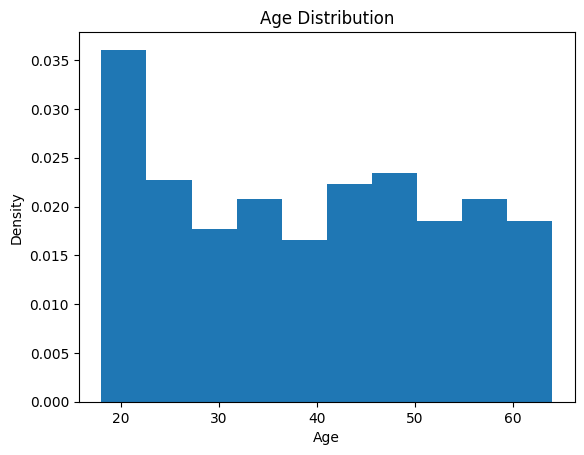

In [8]:
# distrubution for age
plt.hist(med_df['age'], bins=10, density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

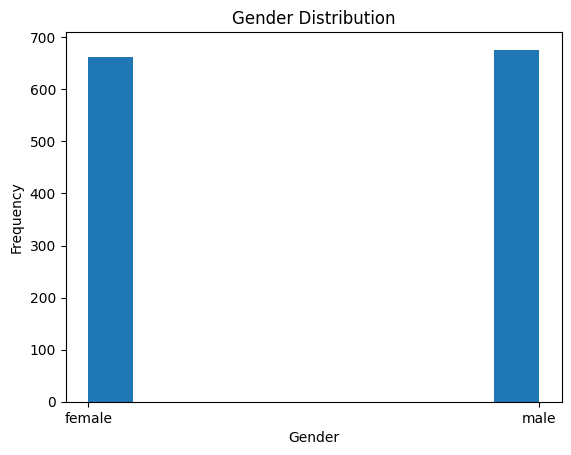

In [9]:
# gender cloumn
plt.hist(med_df['sex'], bins=10)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
plt.show()

In [10]:
 med_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

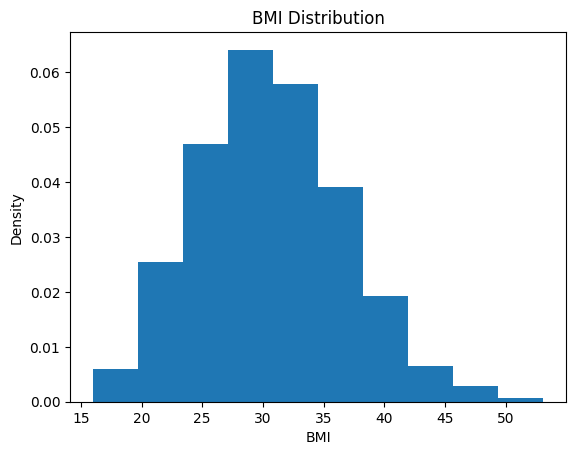

In [11]:
#bmi cloumn
plt.hist(med_df['bmi'], bins=10, density=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution')
plt.show()

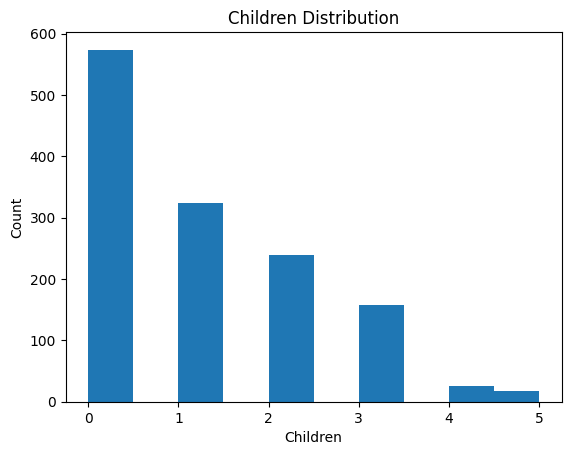

In [12]:
# children column
plt.hist(med_df['children'], bins=10)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children Distribution')
plt.show()

In [13]:
 med_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

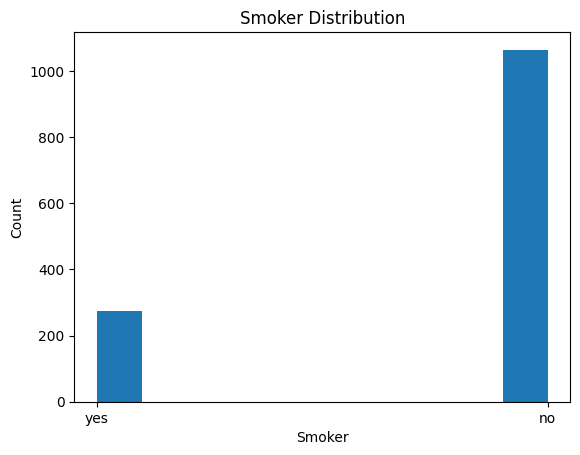

In [14]:
# smoker column
plt.hist(med_df['smoker'], bins=10)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')
plt.show()

In [15]:
 med_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

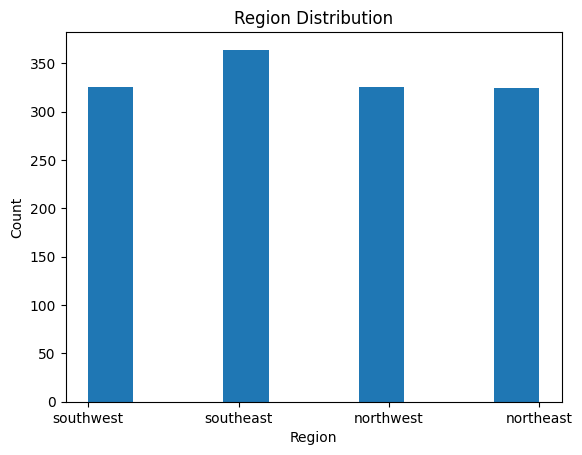

In [16]:
# region column
plt.hist(med_df['region'], bins=10)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

In [17]:
 med_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

* Data pre-processing

* checking for missing values

In [18]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* Convert categorical value into numerical value

In [19]:
med_df.replace({'sex':{'male':0,'female':1}},inplace = True)
med_df.replace({'smoker':{'yes':0,'no':1}},inplace = True)
med_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [20]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


* spiltiing features and target

In [21]:
X = med_df.drop('charges', axis=1)
Y = med_df['charges']

In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

* Data analysis

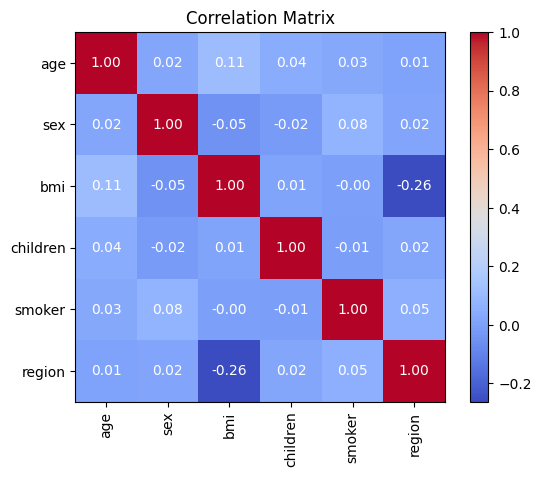

In [24]:
# plot correlation matrix
correlation_matrix = X.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

annot = True
# Adding the correlation values as annotations
if annot:
    for i in range(len(X.columns)):
        for j in range(len(X.columns)):
            text = plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                            ha="center", va="center", color="w")

plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.yticks(range(len(X.columns)), X.columns)
plt.title('Correlation Matrix')

plt.show()

* splitting data into Training data and Testing data

In [25]:

X = (X - np.mean(X)) / np.std(X)

np.random.seed(42)

# Shuffle the indices
indices = np.random.permutation(len(X))

# Define the split ratio
split_ratio = 0.8  # 80% for training, 20% for testing

# Calculate the split index
split_index = int(len(X) * split_ratio)

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]


In [26]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


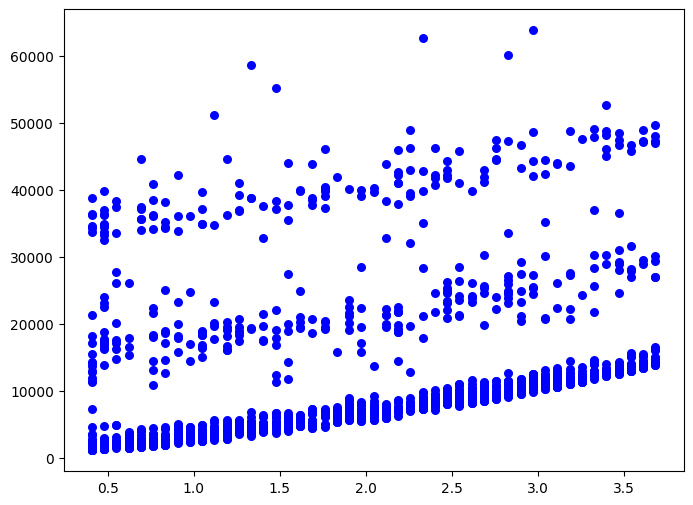

In [27]:
# Convert DataFrame to NumPy array
X_array = X.values
Y_array = Y.values

# Create a scatter plot
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_array[:, 0], Y_array, color="b", marker="o", s=30)
plt.show()

* Training the model

In [28]:
reg = LinearRegression(lr=0.00121,n_iters=9999)
reg.fit(X_train, y_train)

* Predictions the values

In [29]:
predictions = reg.predict(X_test)

In [30]:
def mse(y_test,predictions):
    return np.mean((y_test-predictions)**2)

In [31]:
mse = mse(y_test,predictions)
print(mse)

92363804.83484757
